In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("white")

In [2]:
m2 = pd.read_csv ('../../dataset/Indicators/monetary_supply.csv', encoding='unicode_escape')

In [3]:
m2.head()

,time,close,close (in billions)
0,1959-01-01T01:00:00+01:00,2.870000e+11,286.6
1,1959-02-01T01:00:00+01:00,2.880000e+11,287.7
2,1959-03-01T01:00:00+01:00,2.890000e+11,289.2
3,1959-04-01T01:00:00+01:00,2.900000e+11,290.1
4,1959-05-01T01:00:00+01:00,2.920000e+11,292.2


In [4]:
def cleaned_indicator(df): 
    df['time'] = df['time'].str.extract('(\d{4}-\d{2}-\d{2})', expand=True)
    df['time'] = pd.to_datetime(df["time"])
    df.set_index('time', inplace=True)
    df= df.reindex(pd.date_range(start=df.index.min(),
                                                  end=df.index.max(),
                                                  freq='1D'))
    df.interpolate(method='linear', inplace=True)
    df.index.names = ['Dates']
    df = df[(df.index >= '1976-06-01') & (df.index <= '2022-11-02')]
    return df


In [5]:
m2 = cleaned_indicator(m2)

In [6]:
m2.isna().sum()

close                  0
close (in billions)    0
dtype: int64

In [7]:
def m2_visualization():
    plt.plot(m2['close (in billions)'], color= 'b')
    plt.title('Monetary Supply (M2)', fontsize= 20)
    plt.xlabel('Years', fontsize= 15)
    plt.ylabel('M2 (in billions)', fontsize= 15)
    plt.style.use('seaborn')
    return plt.show()

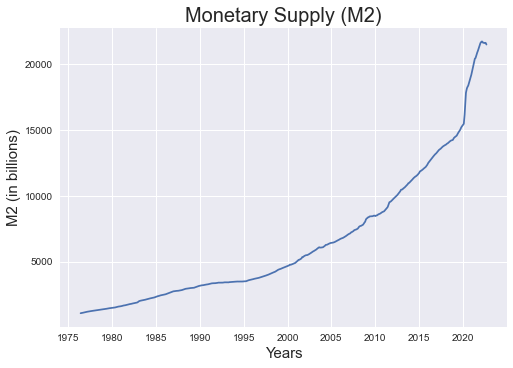

In [9]:
m2_visualization()